In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
df = pd.read_csv('./car_evaluation.csv', sep=',', engine='python')
df.head()

,precio_de_compra,costo_de_mantenimiento,numero_de_puertas,numero_de_personas,tamaño_cajuela,seguridad,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
print(df.shape)
print('\n',df.info())
print('\n',df.isnull().sum())

(1728, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   precio_de_compra        1728 non-null   object
 1   costo_de_mantenimiento  1728 non-null   object
 2   numero_de_puertas       1728 non-null   object
 3   numero_de_personas      1728 non-null   object
 4   tamaño_cajuela          1728 non-null   object
 5   seguridad               1728 non-null   object
 6   decision                1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB

 None

 precio_de_compra          0
costo_de_mantenimiento    0
numero_de_puertas         0
numero_de_personas        0
tamaño_cajuela            0
seguridad                 0
decision                  0
dtype: int64


In [6]:
df.decision.value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: decision, dtype: int64

In [8]:
X=df.drop('decision',axis=1)


Y=df['decision']

print(X.shape,Y.shape)

(1728, 6) (1728,)


In [10]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['precio_de_compra','costo_de_mantenimiento','numero_de_puertas','numero_de_personas','tamaño_cajuela','seguridad'])
x= encoder.fit_transform(X)

/Users/vaps/opt/anaconda3/envs/ia/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
  elif pd.api.types.is_categorical(cols):


In [11]:
print('Original ')
print('\n\n',X.head())
print('\n Mejorado')
print('\n',x.head())

Original 


   precio_de_compra costo_de_mantenimiento numero_de_puertas  \
0            vhigh                  vhigh                 2   
1            vhigh                  vhigh                 2   
2            vhigh                  vhigh                 2   
3            vhigh                  vhigh                 2   
4            vhigh                  vhigh                 2   

  numero_de_personas tamaño_cajuela seguridad  
0                  2          small       low  
1                  2          small       med  
2                  2          small      high  
3                  2            med       low  
4                  2            med       med  

 Mejorado

    precio_de_compra  costo_de_mantenimiento  numero_de_puertas  \
0                 1                       1                  1   
1                 1                       1                  1   
2                 1                       1                  1   
3                 1                       1

In [13]:
#importing necessary packages and modules
from sklearn.model_selection import train_test_split

x_1,xtest,y_1,ytest=train_test_split(x,Y,test_size=0.2,random_state=0,shuffle=True)

xtrain,x_cv,ytrain,y_cv=train_test_split(x_1,y_1,test_size=0.2,random_state=0,shuffle=True)


# Exploring class distribution under train ,crossvalidation and test dataset
print('Entrenamiento Dataset',xtrain.shape,ytrain.shape)
print('\n distribucion de clases en data set de entrenamiento\n',ytrain.value_counts())
print('\n***********')
print("\n  Validacion Cruzada",x_cv.shape,y_cv.shape)
print('\n Distribucion de clases en validacion cruzada\n',y_cv.value_counts())
print('\n***********')
print("\n  Dataset de pruebas",xtest.shape,ytest.shape)
print('\nEtiqueta de clases en el test\n',ytest.value_counts())

Entrenamiento Dataset (1105, 6) (1105,)

 distribucion de clases en data set de entrenamiento
 unacc    779
acc      254
good      37
vgood     35
Name: decision, dtype: int64

***********

  Validacion Cruzada (277, 6) (277,)

 Distribucion de clases en validacion cruzada
 unacc    191
acc       51
vgood     20
good      15
Name: decision, dtype: int64

***********

  Dataset de pruebas (346, 6) (346,)

Etiqueta de clases en el test
 unacc    240
acc       79
good      17
vgood     10
Name: decision, dtype: int64


In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
import scikitplot.metrics as skplt
import matplotlib.pyplot as plt
from sklearn import tree

DecisionTreeClassifier(class_weight='balanced', max_depth=12,
                       min_samples_leaf=5, min_samples_split=5)

 {'max_depth': 12, 'min_samples_leaf': 5, 'min_samples_split': 5}

 0.9422382671480144


 classification report
              precision    recall  f1-score   support

         acc       0.83      0.94      0.88        51
        good       0.76      0.87      0.81        15
       unacc       1.00      0.94      0.97       191
       vgood       0.91      1.00      0.95        20

    accuracy                           0.94       277
   macro avg       0.88      0.94      0.90       277
weighted avg       0.95      0.94      0.94       277



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

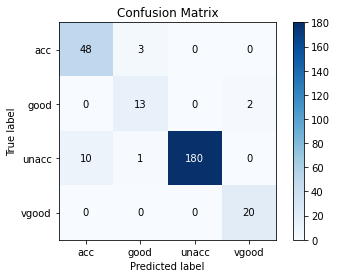

In [16]:
from sklearn.model_selection import GridSearchCV

parameters={'max_depth': list(range(1,30)),
            'min_samples_leaf' : list(range(5,200,20)),
            'min_samples_split': list(range(5,200,20))
            }
model=GridSearchCV(DecisionTreeClassifier(class_weight='balanced'),parameters,n_jobs=-1,cv=10,scoring='accuracy')
model.fit(xtrain,ytrain)
print(model.best_estimator_)
print("\n",model.best_params_)
print("\n",model.score(x_cv,y_cv))

ypredict=model.predict(x_cv)
accuracy=accuracy_score(y_cv,ypredict,normalize=True)*float(100)
print('\n\n classification report')
print(classification_report(y_cv,ypredict))
skplt.plot_confusion_matrix(y_cv,ypredict)


 Accuracy score is 94.21965317919076

 classification report
              precision    recall  f1-score   support

         acc       0.86      0.91      0.88        79
        good       0.73      0.94      0.82        17
       unacc       1.00      0.95      0.97       240
       vgood       0.83      1.00      0.91        10

    accuracy                           0.94       346
   macro avg       0.85      0.95      0.90       346
weighted avg       0.95      0.94      0.94       346



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

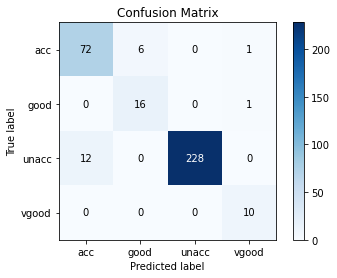

In [17]:
clf=tree.DecisionTreeClassifier(class_weight='balanced',max_depth=9,min_samples_leaf=5,min_samples_split=5)
clf.fit(xtrain,ytrain)
ypredict=clf.predict(xtest)
accuracy=accuracy_score(ytest,ypredict,normalize=True)*float(100)
print('\n Accuracy score is',accuracy)
print('\n classification report')
print(classification_report(ytest,ypredict))
skplt.plot_confusion_matrix(ytest,ypredict)

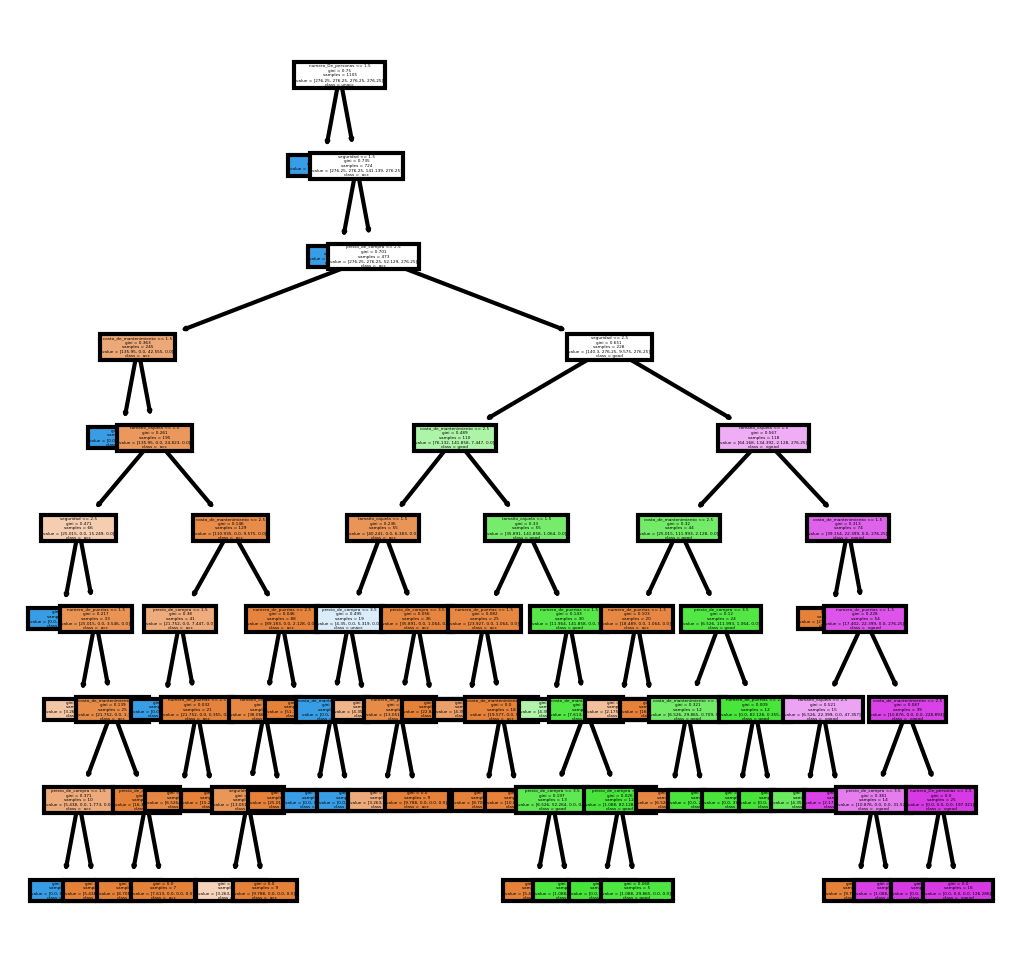

In [18]:
cols=['precio_de_compra','costo_de_mantenimiento','numero_de_puertas','numero_De_personas','tamaño_cajuela','seguridad']
trgt=[' acc','good','unacc ',' vgood']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,feature_names = cols, class_names=trgt,filled = True);